<a href="https://colab.research.google.com/github/aiguozhe01/DIC_Assignment/blob/master/Sprint_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint 機械学習スクラッチ 決定木

## 【考察】

* どう決定木は作られていくか。
* 以下の条件次第で、木の構成は変わる。
    * 学習方法
    * ハイパーパラメータ
    * 訓練データ

* 今回の決定木は量的変数のみに特化する。
    * カテゴリ変数には「0と1」で代用する。
    


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
class ScratchDecisionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装

    Attributes
    ----------
    self.threshold : number
      決定木の閾値
    self.threshold_id : 次の形のndarray, shape (1, 1) 
      閾値のインデックス
    self.leaf_l : number or obj
      左側の葉ノードの推定ラベル
    self.leaf_r : number or obj
      右側の葉ノードの推定ラベル
    """
    
    def __init__(self):
        self.threshold = None
        self.threshold_id = None
        self.leaf_l = None
        self.leaf_r = None
        
        
    def gini_impurity(data):
        """
        ジニ不純度を計算する

        Parameters
        ----------
        data : 次の形のndarray, shape (n_samples,)
    　　　　目的変数の配列

        Returns
        -------
          float
          計算されたジニ不純度

        """
        gi = 0

        labels, count = np.unique(data, return_counts=True)

        for i in range(len(labels)):
            gi += (count[i]/len(data))**2

        return 1 - gi
    
    
    def information_gain(node_root, node_l, node_r):
        """
        利得情報を計算する

        Parameters
        ----------
        node_root : 次の形のndarray, shape (n_samples,)
          分割前の目的変数
        node_l : 次の形のndarray, shape (n_samples,)
          分割後に左ノードに格納された目的変数
        node_r : 次の形のndarray, shape (n_samples,)
          分割後に右ノードに格納された目的変数
          
        Returns
        -------
        ig : float
          計算された利得情報

        """
        ig = gini_impurity(node_root) \
             - len(node_l)/len(node_root) * gini_impurity(node_l) \
             - len(node_r)/len(node_root) * gini_impurity(node_r)

        return ig
    
    
    def fit(self, X, y):
        """
        決定木分類器を学習する
        
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
            
        node_root = y
    
        ig = np.empty(X.shape)

        # 各特徴量に対して利得情報を計算
        for j in range(len(X[0])):
            # 各サンプルを決定境界とした場合の利得情報を計算
            for i in range(len(X)):
                threshold = X[i][j]
                node_l = y[X[:,j] < threshold]
                node_r = y[X[:,j] >= threshold]

                ig[i][j] = information_gain(node_root, node_l, node_r)

        # 最大利得情報のインデックスを２次元で抽出
        self.threshold_id = np.unravel_index(np.argmax(ig), ig.shape)
        self.threshold = X[self.threshold_id]

        self.leaf_l = stats.mode(y[X[:, self.threshold_id[1]] < self.threshold])[0]
        self.leaf_r = stats.mode(y[X[:, self.threshold_id[1]] >= self.threshold])[0]
    
    
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
            
        Returns
        -------
        pred : 次の形のndarray, shape (n_samples, )
          推定された値
        
        """
        
        pred = np.where(X[:, self.threshold_id[1]] < self.threshold, self.leaf_l, self.leaf_r)
    
   
        return pred

## 【問題1】不純度を求める関数（CART式）

### ノードのジニ不純度を計算する関数を作成してください

* ジニ不純度とは、そのノードでのサンプルのクラスの異なりが同程度存在する確率。
    * 確率が高いとノード内のサンプルが全て、異なるクラスに属している。
        * データが半々なのは悪い分類
    * 確率が低いとノード内のサンプルが全て、同じクラスに属している。
    * ベルヌーイ分布における、全てのクラスの分散の和に相当する。
* ノード内の不純度を最大限減らす（ジニ不純度が低い）素性と閾値の組を選ぶために、ジニ不純度を用いる。
* 不純度が最も低ければジニ不純度の値は0、不純度が高くなればなるほどジニ不純度の値が1に漸近する。（[参照先url](https://qiita.com/3000manJPY/items/ef7495960f472ec14377)）
* 最終的に情報利得Δgainで算出する。
    * 利得が高い特徴と閾値ほど、不純度を最大限減らせる。
    


1. ジニ係数を算出する関数を構築する。
2. ジニ係数を用い、情報利得を算出する関数を構築する。


In [ ]:
def gini_impurity(data):
    """
    ジニ不純度を計算する

    Parameters
    ----------
    data : 次の形のndarray, shape (n_samples,)
    目的変数の配列

    Returns
    -------
      float
      計算されたジニ不純度

    """
    gi = 0
    
    labels, count = np.unique(data, return_counts=True)
    
    for i in range(len(labels)):
        gi += (count[i]/len(data))**2
    
    return 1 - gi

In [ ]:
data1 = np.concatenate((np.zeros(15), np.ones(15)))
data2 = np.concatenate((np.concatenate((np.zeros(15), np.ones(15))),
                        np.full(15, 2)))

print(gini_impurity(data1))
print(gini_impurity(data2))

0.5
0.6666666666666667


## 【問題2】情報利得を求める関数

* 問題1で算出した確率はジニ不純度（ジニ係数）$I(t)$をroot_node $I(p)$として用いる。
* 左右各ノードのサンプル数を引数として情報利得を算出する。

In [ ]:
def information_gain(node_root, node_l, node_r):
    """
    利得情報を計算する

    Parameters
    ----------
    node_root : 次の形のndarray, shape (n_samples,)
      分割前の目的変数
    node_l : 次の形のndarray, shape (n_samples,)
      分割後に左ノードに格納された目的変数
    node_r : 次の形のndarray, shape (n_samples,)
      分割後に右ノードに格納された目的変数

    Returns
    -------
    ig : float
      計算された利得情報

    """
    ig = gini_impurity(node_root) \
         - len(node_l)/len(node_root) * gini_impurity(node_l) \
         - len(node_r)/len(node_root) * gini_impurity(node_r)
    
    return ig

In [ ]:
#node_root = np.concatenate((np.zeros(30), np.ones(35)))
node_l = np.concatenate((np.zeros(10), np.ones(30)))
node_r = np.concatenate((np.zeros(20), np.ones(5)))

print(information_gain(node_root, node_l, node_r))

0.14319526627218937


## 【問題3】学習

全サンプルの情報利得を算出する。

1. 説明変数Xから、行列内の要素を一つ抽出する。
2. 抽出した要素を閾値として、全ての説明変数を葉ノードに振り分ける。
    * 閾値以下：左
    * 閾値以上：右
3. 左右の葉ノード内も目的変数yの0, 1の個数を返す。
    * 情報利得算出に必要なのはラベル別の個数！
        * 葉ノードのラベル別個数
            * left_node_1
            * left_node_2
            * right_node_1
            * right_node_2
4. 問題2の関数を用いて、情報利得を算出する。
5. 算出した情報利得を新しい行列内に追記する。
6. 最初に戻り、次のインデックスを抽出する。（繰り返す）
7. 全てのインデックスを基に算出した情報利得を代入した行列を完成させる。
8. 最大値の情報利得を抽出する。
    1. 情報利得を代入した行列内の最大値を抽出する。
    2. 抽出した要素とインデックスをインスタンス化させて、次の推定に活用する。

In [ ]:
def fit(X, y):
    """
    決定木分類器を学習する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    y : 次の形のndarray, shape (n_samples, )
        訓練データの正解値
    """
    
    node_root = y
    
    ig = np.empty(X.shape)
    
    # 各特徴量に対して利得情報を計算
    for j in range(len(X[0])):
        # 各サンプルを決定境界とした場合の利得情報を計算
        for i in range(len(X)):
            threshold = X[i][j]
            node_l = y[X[:,j] < threshold]
            node_r = y[X[:,j] >= threshold]

            ig[i][j] = information_gain(node_root, node_l, node_r)
        
    # 最大利得情報のインデックスを２次元で抽出
    threshold_id = np.unravel_index(np.argmax(ig), ig.shape)
    threshold = X[threshold_id]
    
    leaf_l = stats.mode(y[X[:, threshold_id[1]] < threshold])[0]
    leaf_r = stats.mode(y[X[:, threshold_id[1]] >= threshold])[0]
  
    return threshold_id, threshold

## 【問題4】推定

推定する仕組みを実装する。

1. ScratchDecesionTreeClassifierDepth1クラスの雛形に含まれるpredictメソッドに書き加える。
2. 入力されたデータの値が、学習後の関数を用いて、どの葉ノードのどのクラスに到達するかを確認する。

In [ ]:
def predict(X):
    """
    決定木分類器を使いラベルを推定する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量

    Returns
    -------
    pred : 次の形のndarray, shape (n_samples, )
      推定された値

    """
    
    pred = np.where(X < threshold, leaf_l, leaf_r)
    
    return pred

## 【問題5】学習と推定

In [ ]:
# シンプルデータセット2作成コード

X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
           [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
           [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
           [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
           [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
           [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
           [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
           [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
           [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
           [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
           [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
           [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
           [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
           [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
           [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
           [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
           [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
           [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
           [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
           [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# sklearnの決定木を読み込み
from sklearn.tree import DecisionTreeClassifier

# 評価指標の読み込みおよび関数化
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def get_scores(y_true, y_pred):
    print("-"*20)
    print("正解率：{:.2f}".format(accuracy_score(y_true, y_pred)))
    print("適合率：{:.2f}".format(precision_score(y_true, y_pred)))
    print("再現率：{:.2f}".format(recall_score(y_true, y_pred)))
    print("F1値：{:.2f}".format(f1_score(y_true, y_pred)))
    print("-"*20)
    print("\n")

In [ ]:
# データの分割（今回は7：3の割合）
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

print(X_train.shape)
print(y_train.shape)

(30, 2)
(30,)


In [ ]:
# スクラッチモデルの学習と推定
scratch_tree = ScratchDecisionTreeClassifierDepth1()

scratch_tree.fit(X_train, y_train)

scratch_pred = scratch_tree.predict(X_test)

print("スクラッチモデルの成績")
get_scores(y_test, scratch_pred)

# sklearnモデルの学習と推定
sk_tree = DecisionTreeClassifier(max_depth=1)

sk_tree.fit(X_train, y_train)

sk_pred = sk_tree.predict(X_test)

print("sklearnモデルの成績")
get_scores(y_test, sk_pred)

スクラッチモデルの成績
--------------------
正解率：0.50
適合率：0.50
再現率：0.20
F1値：0.29
--------------------


sklearnモデルの成績
--------------------
正解率：0.50
適合率：0.50
再現率：0.20
F1値：0.29
--------------------




## 【問題6】決定領域の可視化

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, target_names, step=0.01, title='decision region', xlabel='xlabel',
                    ylabel='ylabel'):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

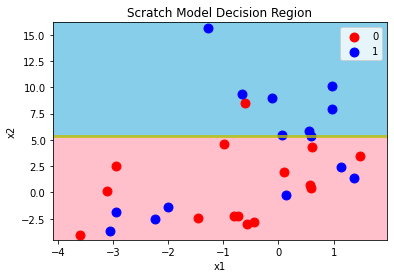

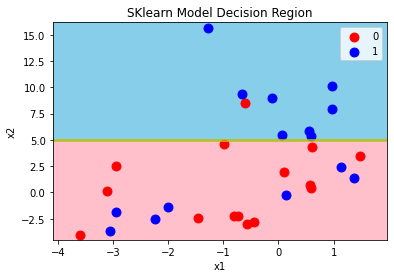

In [ ]:
# スクラッチモデルの可視化
decision_region(X_train, y_train, scratch_tree, title='Scratch Model Decision Region',
                xlabel='x1', ylabel='x2', target_names=['0', '1'])

# sklearnモデルの可視化
decision_region(X_train, y_train, sk_tree, title='SKlearn Model Decision Region',
                xlabel='x1', ylabel='x2', target_names=['0', '1'])